In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels

### 1. Load and visualize the data

a) 

In [43]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [44]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'})

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [45]:
print(list(transcriptomics.columns.values))

['Unnamed: 0', 'Sample_1_preadi', 'Sample_2_preadi', 'Sample_3_preadi', 'Sample_4_preadi', 'Sample_5_preadi', 'Sample_6_preadi', 'Sample_7_preadi', 'Sample_8_preadi', 'Sample_9_preadi', 'Sample_10_preadi', 'Sample_11_preadi', 'Sample_12_preadi', 'Sample_13_preadi', 'Sample_14_preadi', 'Sample_15_preadi', 'Sample_16_preadi', 'Sample_17_preadi', 'Sample_18_preadi', 'Sample_19_preadi', 'Sample_20_preadi', 'Sample_21_preadi', 'Sample_22_preadi', 'Sample_23_preadi', 'Sample_24_preadi', 'Sample_25_preadi', 'Sample_26_preadi', 'Sample_27_preadi', 'Sample_28_preadi', 'Sample_29_preadi', 'Sample_30_preadi', 'Sample_31_preadi', 'Sample_32_preadi', 'Sample_33_preadi', 'Sample_34_preadi', 'Sample_35_preadi', 'Sample_36_preadi', 'Sample_37_preadi', 'Sample_38_preadi', 'Sample_39_preadi', 'Sample_40_preadi', 'Sample_41_adipo', 'Sample_42_adipo', 'Sample_43_adipo', 'Sample_44_adipo', 'Sample_45_adipo', 'Sample_46_adipo', 'Sample_47_adipo', 'Sample_48_adipo', 'Sample_49_adipo', 'Sample_50_adipo', 'Sam

In [46]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values[1:]) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [47]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [48]:
transcriptomics.iloc[:,1:]

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
1,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
3,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
4,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
(transcriptomics.iloc[:,1:] != 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
63672     True
63673    False
63674    False
63675    False
63676     True
Length: 63677, dtype: bool

In [50]:
transcriptomics = transcriptomics.loc[(transcriptomics.iloc[:,1:] != 0).any(axis=1),:]

In [51]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
63669,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
63670,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [52]:
transcriptomics.iloc[:,1:].sum()

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

In [53]:
depth = pd.DataFrame({'Samples':list(range(1,81)), 'depth':transcriptomics.iloc[:,1:].sum()})

In [54]:
(transcriptomics.iloc[:,1:].sum() == 1000000).all()

True

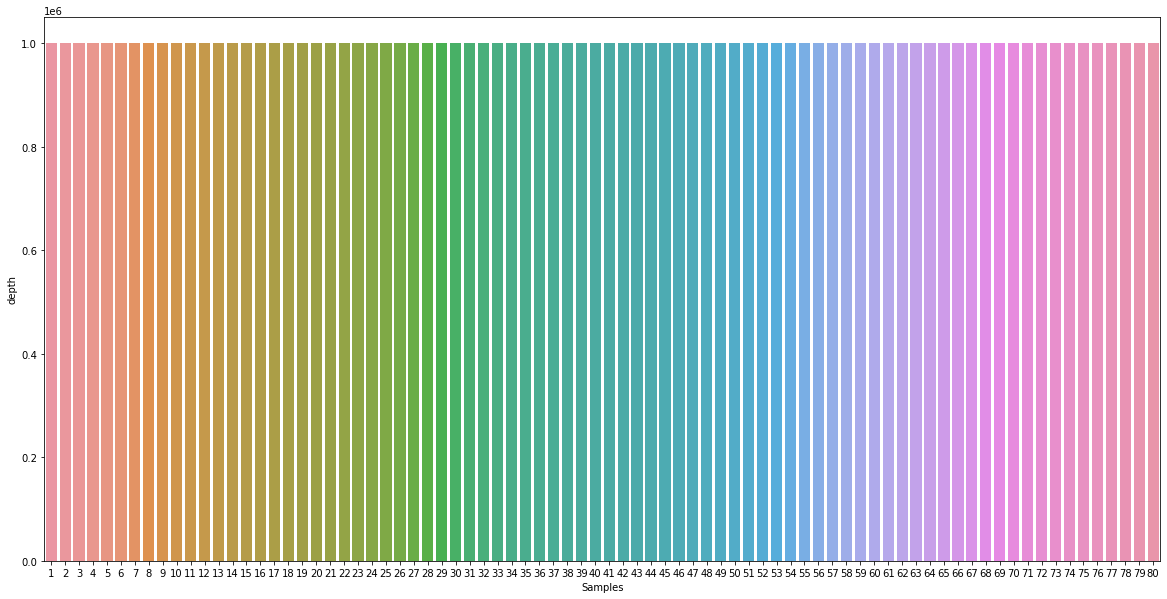

In [55]:
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [56]:
dict_sample.values()

dict_values(['PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo'])

In [57]:
X = transcriptomics.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] =dict_sample.values()
pca_output_df

,PCA1,PCA2,PCA3,groups
0,59744.204875,5181.484207,34953.673194,PreAdipo
1,-36447.502550,11214.469551,6564.207381,PreAdipo
2,-15666.397486,-7873.272341,3183.165238,PreAdipo
3,-22423.413307,-20027.140990,-15412.563780,PreAdipo
4,-15830.729625,-13797.002922,-8727.933106,PreAdipo
...,...,...,...,...
75,39830.374618,16913.116447,2542.199214,Adipo
76,44353.454788,-2109.828106,-14291.751796,Adipo
77,-2515.045934,2289.387447,-29504.065115,Adipo
78,-23979.413582,32201.099006,-2077.782790,Adipo


In [58]:
fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [59]:
transcriptomics_transf =pd.DataFrame(np.log2(1+transcriptomics.iloc[:,1:]))

In [60]:
transcriptomics_transf.insert(0, 'Gene_ID', transcriptomics.iloc[:,0])

In [61]:
transcriptomics_transf

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
1,ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
2,ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
3,ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
4,ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
63669,ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
63670,ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63672,ENSG00000273489,0.000000,0.000000,0.000000,1.584963,0.000000,1.000000,3.169925,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [62]:
X = transcriptomics_transf.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-42.826329,58.870243,7.208661,PreAdipo
1,-46.518798,-5.596112,-14.513415,PreAdipo
2,-63.707132,-33.929064,36.996293,PreAdipo
3,-57.726232,-67.490786,-11.238503,PreAdipo
4,-49.397369,-52.324074,9.426668,PreAdipo
...,...,...,...,...
75,53.782770,-3.432558,-58.807232,Adipo
76,69.008352,1.024694,43.880189,Adipo
77,61.583717,-54.186669,4.280247,Adipo
78,30.881711,-23.491778,-43.380652,Adipo


In [63]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

Transformed data has better cluster

### 2. Differential gene expression

In [64]:
de_results = pd.DataFrame(columns = ["pval"," fdr","log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

In [65]:
transcriptomics.describe()

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
count,30238.000000,30238.000000,30238.00000,30238.000000,30238.00000,30238.000000,30238.000000,30238.000000,30238.00000,30238.000000,...,30238.000000,30238.000000,30238.000000,30238.000000,30238.000000,30238.00000,30238.00000,30238.000000,30238.000000,30238.000000
mean,33.070970,33.070970,33.07097,33.070970,33.07097,33.070970,33.070970,33.070970,33.07097,33.070970,...,33.070970,33.070970,33.070970,33.070970,33.070970,33.07097,33.07097,33.070970,33.070970,33.070970
std,775.924245,490.943678,443.85956,341.385152,401.90836,452.605393,519.896442,439.523785,420.34004,588.511499,...,486.648479,441.241712,477.096957,463.873034,633.637434,603.33362,582.39901,391.209602,504.201271,474.647585
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,6.000000,7.000000,7.00000,10.000000,8.00000,7.000000,6.000000,7.000000,8.00000,5.000000,...,6.000000,7.000000,6.000000,7.000000,6.000000,8.00000,6.00000,8.000000,8.000000,8.000000
max,118043.000000,55421.000000,35846.00000,21618.000000,31881.00000,35318.000000,48123.000000,40814.000000,46908.00000,66177.000000,...,45178.000000,41653.000000,53725.000000,54853.000000,91728.000000,89876.00000,80338.00000,35885.000000,63825.000000,54572.000000


In [66]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _,pval = ttest_ind(gene[1:41], gene[42:81])
    pvalue.append(pval)

In [67]:
pvalue

[0.030795684409018677,
 7.174029797192268e-10,
 0.4160088959994662,
 0.4232047312729389,
 0.39404505172286963,
 3.272651552324564e-12,
 4.5215038386974086e-08,
 4.390624655504188e-08,
 0.0017568072735533481,
 0.0443374733391082,
 0.5298546934400564,
 0.6116823092850274,
 0.4886298187256958,
 0.22449676732612478,
 0.37089015583341545,
 0.17225572638863917,
 0.26048038676665614,
 0.009501760296873097,
 0.15544078546388662,
 0.09815101949940123,
 0.3142764240989545,
 0.3720288044833827,
 0.381351484332203,
 0.020597264307292328,
 0.7384009772528072,
 0.616172240214473,
 0.15149687841946274,
 0.4049653546742876,
 0.009417424386647161,
 1.4085037689773552e-12,
 0.7573915480067872,
 0.6848444053086156,
 0.3496303493854831,
 1.1008805815558478e-15,
 0.5718795245221766,
 0.5358926672468953,
 0.6228801916962026,
 2.710595446214632e-09,
 7.436102429753345e-07,
 0.4546436820784866,
 0.5786312925133861,
 0.9795997218601918,
 0.4666355432465532,
 0.2339860274159174,
 1.489469586218747e-05,
 0.55472

next step Welch test guys (enfin chais pas jai pas verif la variance)

##### 2.d)

In [74]:
de_results["log2_mean_preadipo"] = np.log2(transcriptomics.iloc[:,1:41].mean(axis=1)+1)
de_results["log2_mean_adipo"] = np.log2(transcriptomics.iloc[:,41:81].mean(axis=1)+1)

de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
8792,NaN,NaN,0.000000,0.035624,inf
52680,NaN,NaN,0.000000,0.035624,inf
56994,NaN,NaN,0.000000,0.070389,inf
11972,NaN,NaN,0.000000,0.137504,inf
56976,NaN,NaN,0.000000,0.169925,inf
...,...,...,...,...,...
43450,NaN,NaN,0.070389,0.000000,0.0
15398,NaN,NaN,0.035624,0.000000,0.0
15387,NaN,NaN,0.137504,0.000000,0.0
18011,NaN,NaN,0.035624,0.000000,0.0


##### 2.e)

In [79]:
de_results["log2_fold_change"] = de_results["log2_mean_adipo"] - de_results["log2_mean_preadipo"]
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
12946,NaN,NaN,6.845176,13.011066,6.165889
6282,NaN,NaN,7.183883,13.134579,5.950695
765,NaN,NaN,2.255501,7.901772,5.646271
5302,NaN,NaN,3.520422,9.164656,5.644233
7147,NaN,NaN,1.419539,6.984988,5.565449
...,...,...,...,...,...
1864,NaN,NaN,5.984703,3.083213,-2.901490
4744,NaN,NaN,4.842979,1.877744,-2.965235
9367,NaN,NaN,4.836682,1.827819,-3.008863
55492,NaN,NaN,4.330917,1.247928,-3.082989
